In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### FashionMNIST.

In [37]:
import torchvision as tv
import time

In [38]:
BATCH_SIZE = 256

In [39]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset  = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

### Знакомство с данными

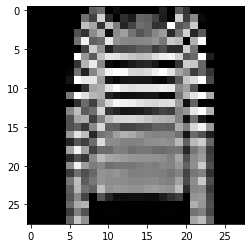

In [40]:
plt.imshow(train_dataset[505][0].numpy().reshape(28, 28), cmap='gray')

In [41]:
train_dataset[505][1]

2

In [42]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [43]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [44]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

## Модель

In [45]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"); dev

device(type='cuda')

In [46]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.BatchNorm1d(784),
    torch.nn.Linear(784,1568),
    torch.nn.Dropout(),
    torch.nn.ReLU(),
    torch.nn.Linear(1568, 784),
    torch.nn.BatchNorm1d(784),
    torch.nn.ReLU(),
    torch.nn.Linear(784,392),
    torch.nn.BatchNorm1d(392),
    torch.nn.ReLU(),
    torch.nn.Linear(392,98),
    torch.nn.BatchNorm1d(98),
    torch.nn.ReLU(),
    torch.nn.Linear(98, 49),
    torch.nn.ReLU(),
    torch.nn.Linear(49, 10)
)

In [47]:
model = model.to(dev)

In [48]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.AdamW(model.parameters(), lr=.0001)
num_epochs = 50

In [49]:
for ep in range(num_epochs):
    train_iters, train_passed = 0, 0
    train_loss, train_acc = 0., 0.
    start=time.time()

    model.train()
    for X, y in train:
        trainer.zero_grad()
        X, y = X.to(dev), y.to(dev)
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
        
    test_iters, test_passed = 0, 0
    test_loss, test_acc = 0., 0.
    
    model.eval()
    with torch.no_grad():
        for X, y in test:
            X, y = X.to(dev), y.to(dev)
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
        
    
    print(f"ep: {ep + 1}, taked: {time.time()-start:.3f}, train_loss: {train_loss/train_iters:.7f},\
    train_acc: {train_acc/train_passed:.7f}, test_loss: {test_loss/test_iters:.7f},\
    test_acc: {test_acc/test_passed:7f}")

ep: 1, taked: 5.201, train_loss: 1.2413728,    train_acc: 0.7433667, test_loss: 0.6980014,    test_acc: 0.830300
ep: 2, taked: 5.190, train_loss: 0.5524343,    train_acc: 0.8551833, test_loss: 0.4225092,    test_acc: 0.866000
ep: 3, taked: 5.354, train_loss: 0.3945898,    train_acc: 0.8739000, test_loss: 0.3663657,    test_acc: 0.873300
ep: 4, taked: 5.349, train_loss: 0.3384779,    train_acc: 0.8862000, test_loss: 0.3407968,    test_acc: 0.879800
ep: 5, taked: 5.272, train_loss: 0.3082359,    train_acc: 0.8925167, test_loss: 0.3266042,    test_acc: 0.884900
ep: 6, taked: 5.173, train_loss: 0.2854018,    train_acc: 0.8984833, test_loss: 0.3139289,    test_acc: 0.885600
ep: 7, taked: 5.438, train_loss: 0.2673304,    train_acc: 0.9035000, test_loss: 0.3100778,    test_acc: 0.887400
ep: 8, taked: 5.577, train_loss: 0.2514966,    train_acc: 0.9089167, test_loss: 0.3079917,    test_acc: 0.888000
ep: 9, taked: 5.349, train_loss: 0.2389509,    train_acc: 0.9136500, test_loss: 0.3022425,    te